In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance


In [9]:
df = pd.read_csv("/Users/kxng/Documents/Python/Myproject/marketing-sales-performance-analysis/data/AI_Impact_on_Jobs_2030.csv")

# Display basic information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print('Missing Values by Column:')
print(missing_values)

# If there are missing values, we may choose to impute or drop them
if missing_values.sum() > 0:
    # For demonstration, we fill numeric missing values with the median
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].median(), inplace=True)
    
    # For categorical columns, fill missing with the mode
    categorical_cols = df.select_dtypes(exclude=[np.number]).columns
    for col in categorical_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)
    print('Missing values handled.')
else:
    print('No missing values detected.')

# Verifying data types
print('Data types of the columns:')
print(df.dtypes)

Missing Values by Column:
Job_Title                      0
Average_Salary                 0
Years_Experience               0
Education_Level                0
AI_Exposure_Index              0
Tech_Growth_Factor             0
Automation_Probability_2030    0
Risk_Category                  0
Skill_1                        0
Skill_2                        0
Skill_3                        0
Skill_4                        0
Skill_5                        0
Skill_6                        0
Skill_7                        0
Skill_8                        0
Skill_9                        0
Skill_10                       0
dtype: int64
No missing values detected.
Data types of the columns:
Job_Title                       object
Average_Salary                   int64
Years_Experience                 int64
Education_Level                 object
AI_Exposure_Index              float64
Tech_Growth_Factor             float64
Automation_Probability_2030    float64
Risk_Category                   object


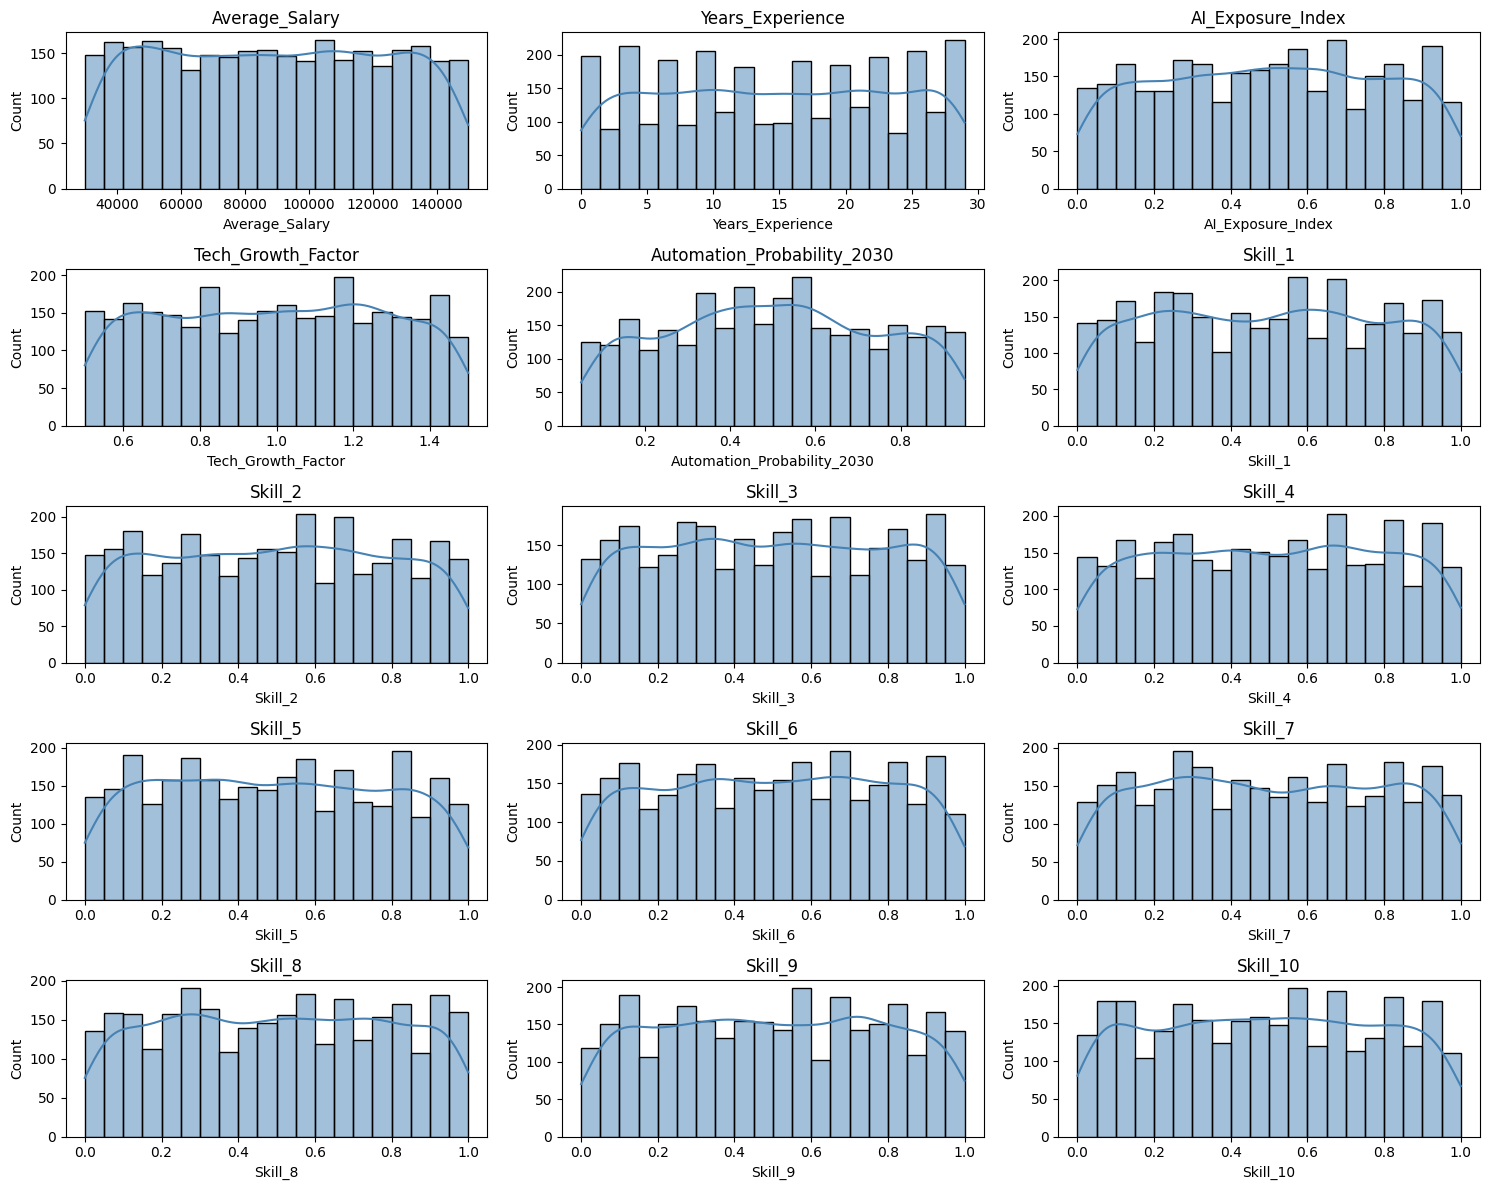

In [11]:
# Histogram for numerical variables
numeric_df = df.select_dtypes(include=[np.number])
numeric_cols = numeric_df.columns

plt.figure(figsize=(15, 12))
for idx, col in enumerate(numeric_cols):
    plt.subplot(5, 3, idx+1)
    sns.histplot(df[col], kde=True, bins=20, color='steelblue')
    plt.title(col)
plt.tight_layout()
plt.show()

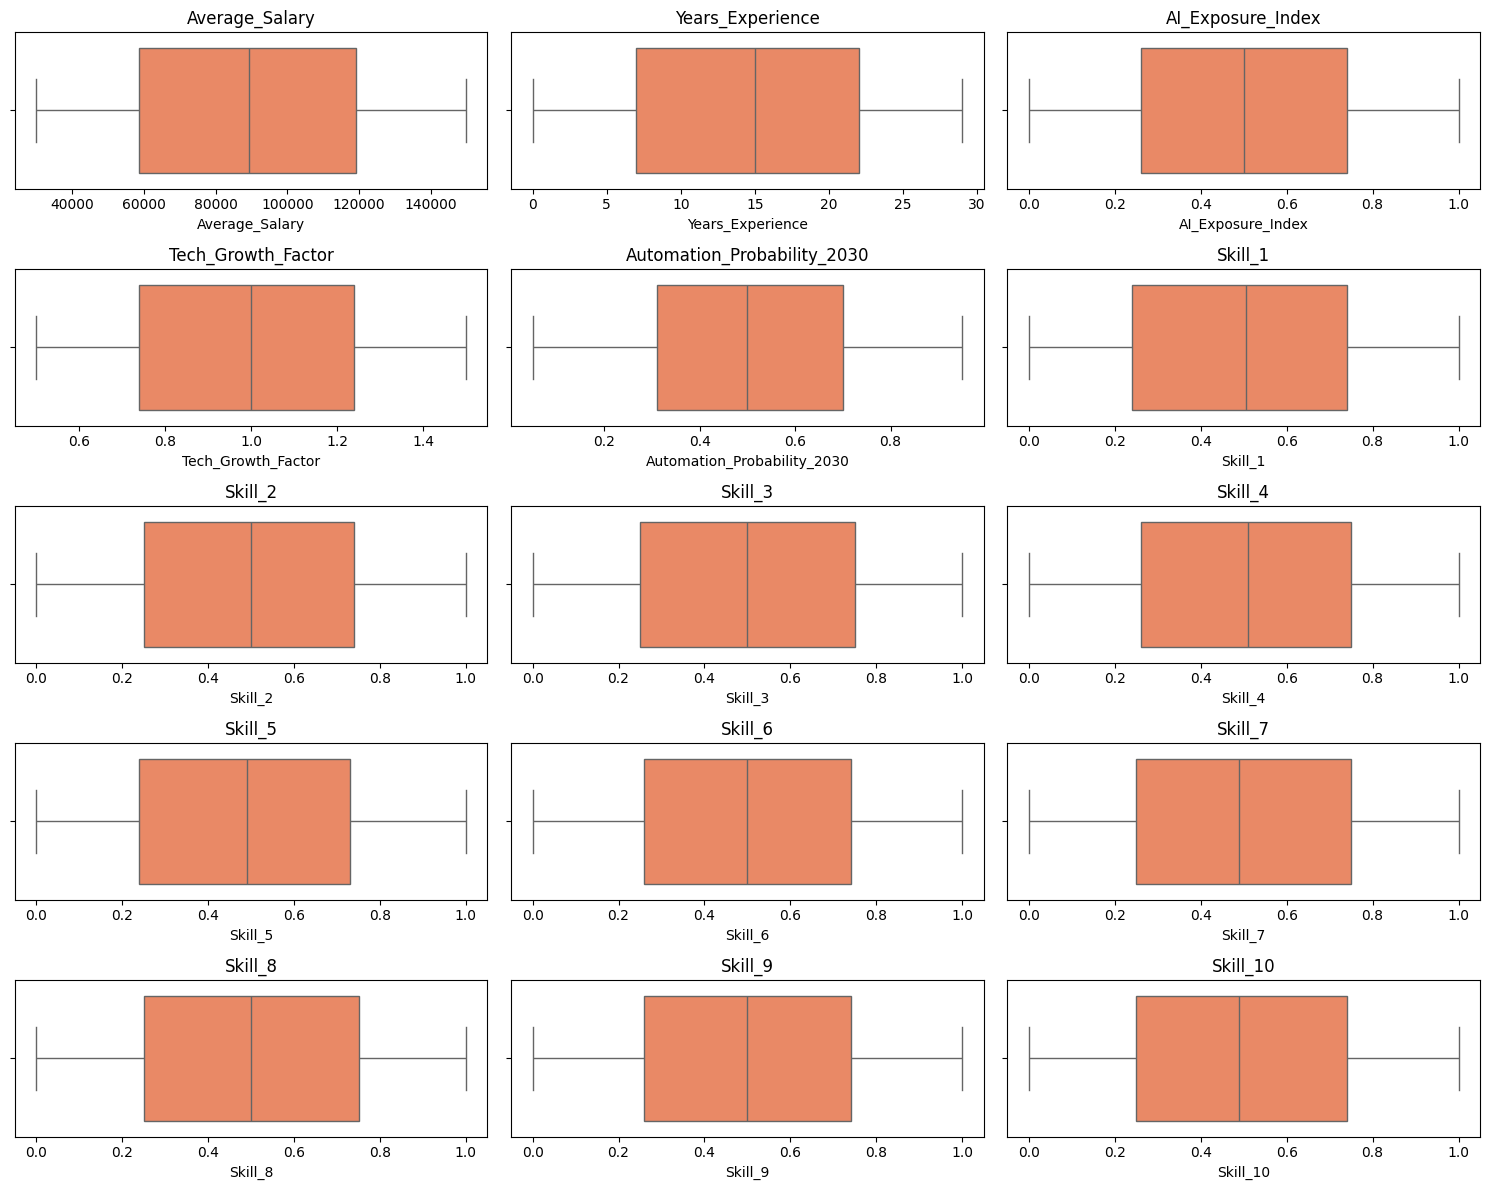

In [12]:
# Box plots to visualize distributions and potential outliers
plt.figure(figsize=(15, 12))
for idx, col in enumerate(numeric_cols):
    plt.subplot(5, 3, idx+1)
    sns.boxplot(x=df[col], color='coral')
    plt.title(col)
plt.tight_layout()
plt.show()


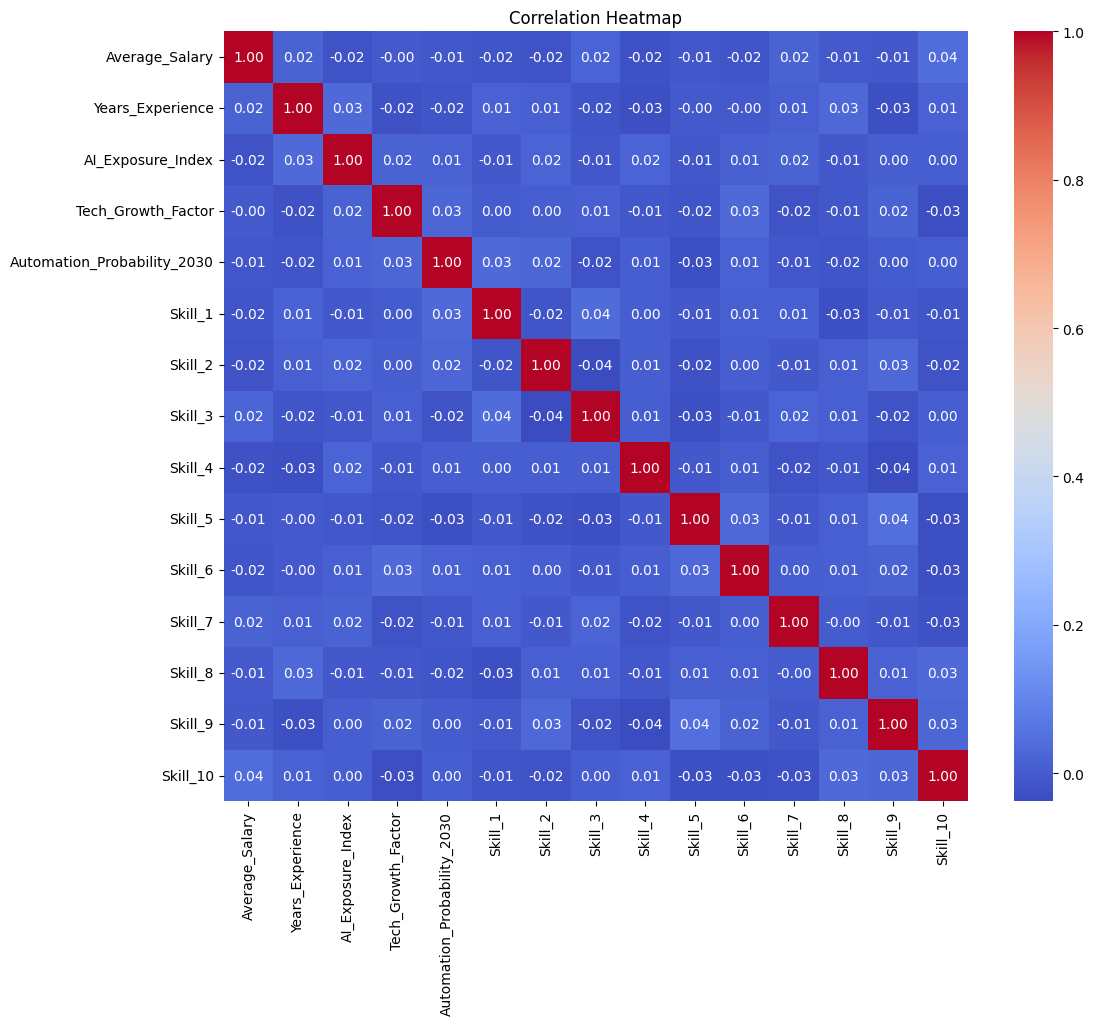

In [13]:
# Only perform correlation analysis if there are 4 or more numeric columns
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 10))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print('Not enough numeric columns for a meaningful correlation heatmap.')

Linear Regression R^2 Score: -0.0062


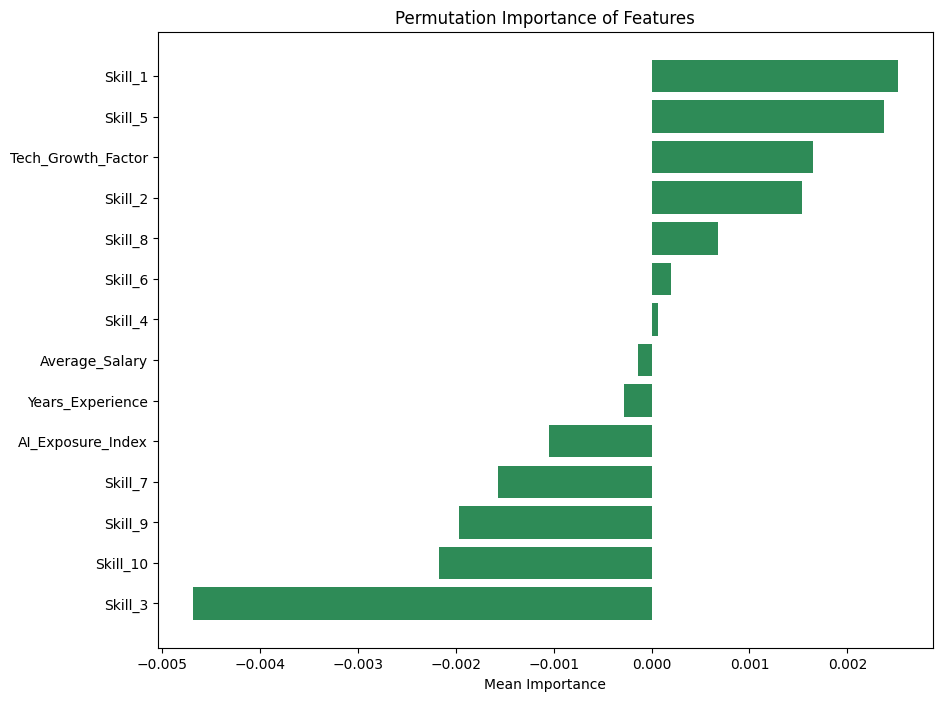

In [14]:
# Prepare the data for prediction
target = 'Automation_Probability_2030'

# Select features: we will include numerical columns available except the target
features = numeric_df.drop(columns=[target]).columns.tolist()

X = numeric_df[features]
y = numeric_df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Evaluate the model using R^2 score
r2 = r2_score(y_test, y_pred)
print(f'Linear Regression R^2 Score: {r2:.4f}')

# Permutation Importance to check feature significance
result = permutation_importance(lr, X_test, y_test, n_repeats=10, random_state=42)

sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 8))
plt.barh(np.array(features)[sorted_idx], result.importances_mean[sorted_idx], color='seagreen')
plt.xlabel('Mean Importance')
plt.title('Permutation Importance of Features')
plt.show()